### Install "ner-d" package

In [1]:
!pip install ner-d

     |████████████████████████████████| 10.3 MB 6.5 MB/s 
     |████████████████████████████████| 2.2 MB 45.3 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


### Import libraries

In [2]:
import os
import pandas as pd
from itertools import groupby
from operator import itemgetter
import re
from collections import Counter
import numpy as np
import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from string import punctuation
import string
from collections import Counter



from nltk import regexp_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import RegexpParser
from nltk import FreqDist
from nltk.tokenize import sent_tokenize




from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF


import spacy
from spacy import displacy

from nerd import ner

import datetime

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Download nltk packages

In [3]:
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

### Read text files and save as a list

In [4]:
# a function to read files 
def read_file(file):
    with open(file, 'r', encoding="utf-8") as f:
        text = f.read()
    return text

# set path to text files
file_dir = './Data/Text_Files/'
all_text_list = []

# find files with .txt and read them
for file in os.listdir(file_dir):
    if file.endswith(".txt"):
        file_path = f'{file_dir}{file}'
        all_text_list.append(read_file(file_path))

In [5]:
print(f"number of texts: {len(all_text_list)}")

number of texts: 82


### Sample of our data

In [6]:
# sample text
print(f"sample text: {all_text_list[0][:500]}")

sample text: 
Mr. Speaker, Mr. Vice President, Members of the 94th Congress, and distinguished guests:
Twenty-six years ago, a freshman Congressman, a young fellow with lots of idealism who was out to change the world, stood before Sam Rayburn in the well of the House and solemnly swore to the same oath that all of you took yesterday--an unforgettable experience, and I congratulate you all.
Two days later, that same freshman stood at the back of this great Chamber-over there someplace--as President Truman, a


### Read csv file

In [7]:
df = pd.read_csv("./Data/metadata.csv")
df.head()

,Index,President,Categories,Date,Citation,Title
0,0,Harry S. Truman,"['Presidential', 'State of the Union Addresses...","January 06, 1947","Harry S. Truman, Annual Message to the Congres...",Annual Message to the Congress on the State of...
1,1,Harry S. Truman,"['Presidential', 'State of the Union Addresses...","January 07, 1948","Harry S. Truman, Annual Message to the Congres...",Annual Message to the Congress on the State of...
2,2,Harry S. Truman,"['Presidential', 'State of the Union Addresses...","January 05, 1949","Harry S. Truman, Annual Message to the Congres...",Annual Message to the Congress on the State of...
3,3,Harry S. Truman,"['Presidential', 'State of the Union Addresses...","January 04, 1950","Harry S. Truman, Annual Message to the Congres...",Annual Message to the Congress on the State of...
4,4,Harry S. Truman,"['Presidential', 'State of the Union Addresses...","January 08, 1951","Harry S. Truman, Annual Message to the Congres...",Annual Message to the Congress on the State of...


#### Change Date Type to datetime

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%B %d, %Y')
df['Year'] = df['Date'].apply(lambda x : x.year)

### Concatenation of the president's name to the year
`President Name`_`Year`

In [9]:
years_list = list(df['Year'])
president_list = list(df['President'])
concat_president_year = []
for p, y in zip(president_list,years_list):
  concat_text = f'{p}_{y}'
  concat_president_year.append(concat_text)

In [10]:
concat_president_year

['Harry S. Truman_1947',
 'Harry S. Truman_1948',
 'Harry S. Truman_1949',
 'Harry S. Truman_1950',
 'Harry S. Truman_1951',
 'Harry S. Truman_1952',
 'Harry S. Truman_1953',
 'Dwight D. Eisenhower_1953',
 'Dwight D. Eisenhower_1954',
 'Dwight D. Eisenhower_1955',
 'Dwight D. Eisenhower_1956',
 'Dwight D. Eisenhower_1957',
 'Dwight D. Eisenhower_1958',
 'Dwight D. Eisenhower_1959',
 'Dwight D. Eisenhower_1960',
 'Dwight D. Eisenhower_1961',
 'John F. Kennedy_1961',
 'John F. Kennedy_1962',
 'John F. Kennedy_1963',
 'Lyndon B. Johnson_1964',
 'Lyndon B. Johnson_1965',
 'Lyndon B. Johnson_1966',
 'Lyndon B. Johnson_1967',
 'Lyndon B. Johnson_1968',
 'Lyndon B. Johnson_1969',
 'Richard Nixon_1970',
 'Richard Nixon_1971',
 'Richard Nixon_1972',
 'Richard Nixon_1972',
 'Richard Nixon_1973',
 'Richard Nixon_1973',
 'Richard Nixon_1973',
 'Richard Nixon_1973',
 'Richard Nixon_1973',
 'Richard Nixon_1973',
 'Richard Nixon_1974',
 'Richard Nixon_1974',
 'Gerald R. Ford_1975',
 'Gerald R. Ford_1

In [11]:
df

,Index,President,Categories,Date,Citation,Title,Year
0,0,Harry S. Truman,"['Presidential', 'State of the Union Addresses...",1947-01-06,"Harry S. Truman, Annual Message to the Congres...",Annual Message to the Congress on the State of...,1947
1,1,Harry S. Truman,"['Presidential', 'State of the Union Addresses...",1948-01-07,"Harry S. Truman, Annual Message to the Congres...",Annual Message to the Congress on the State of...,1948
2,2,Harry S. Truman,"['Presidential', 'State of the Union Addresses...",1949-01-05,"Harry S. Truman, Annual Message to the Congres...",Annual Message to the Congress on the State of...,1949
3,3,Harry S. Truman,"['Presidential', 'State of the Union Addresses...",1950-01-04,"Harry S. Truman, Annual Message to the Congres...",Annual Message to the Congress on the State of...,1950
4,4,Harry S. Truman,"['Presidential', 'State of the Union Addresses...",1951-01-08,"Harry S. Truman, Annual Message to the Congres...",Annual Message to the Congress on the State of...,1951
...,...,...,...,...,...,...,...
77,77,Barack Obama,"['Presidential', 'State of the Union Addresses...",2016-01-12,"Barack Obama, Address Before a Joint Session o...",Address Before a Joint Session of the Congress...,2016
78,78,Donald J. Trump,"['Presidential', 'State of the Union Addresses...",2018-01-30,"Donald J. Trump, Address Before a Joint Sessio...",Address Before a Joint Session of the Congress...,2018
79,79,Donald J. Trump,"['Presidential', 'State of the Union Addresses...",2019-02-05,"Donald J. Trump, Address Before a Joint Sessio...",Address Before a Joint Session of the Congress...,2019
80,80,Donald J. Trump,"['Presidential', 'State of the Union Addresses...",2020-02-04,"Donald J. Trump, Address Before a Joint Sessio...",Address Before a Joint Session of the Congress...,2020


### Groupby persidents:
`dict[president_name]` = `[texts]`


In [12]:
president_name = df['President'].tolist()
president_text_dict = {keys: [i for _, i in sub] for keys, sub in groupby(
         zip(president_name, all_text_list), key = itemgetter(0))}

In [13]:
president_text_dict.keys()

dict_keys(['Harry S. Truman', 'Dwight D. Eisenhower', 'John F. Kennedy', 'Lyndon B. Johnson', 'Richard Nixon', 'Gerald R. Ford', 'Jimmy Carter', 'Ronald Reagan', 'George Bush', 'William J. Clinton', 'George W. Bush', 'Barack Obama', 'Donald J. Trump', 'Joseph R. Biden'])

In [14]:
len(president_text_dict['Barack Obama'])

7

### Tokenizer

In [15]:
# https://github.com/language-ml/course-nlp-ir-1-text-exploring/blob/main/notebooks/English/ExploreYourTextCollection-English.ipynb
pattern = r'''(?x)          # set flag to allow verbose regexps
        (?:[a-zA-Z]\.)+(?:[a-zA-Z])?         # abbreviations, e.g. U.S.A.
      | \w+(?:-\w+)*        # words with optional internal hyphens
      | \$?\d+(?:\.\d+)?%?\s?  # currency and percentages, e.g. $12.40, 82%
      | \.\.\.              # ellipsis
      | [][.,;"'?():_`-]    # these are separate tokens; includes ], [
    '''

pattern = re.compile(pattern)

def tokenize_text(text):
    return regexp_tokenize(text, pattern)

### Lemmatizer

In [16]:
def lemmatize_all(sentence):
    l = []
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(tokenize_text(sentence)):
        if tag.startswith('N'):
            l.append(wnl.lemmatize(word, pos='n'))
        elif tag.startswith('V'):
            l.append(wnl.lemmatize(word, pos='v'))
        elif tag.startswith('J'):
            l.append(wnl.lemmatize(word, pos='a'))
        elif tag.startswith('R'):
            l.append(wnl.lemmatize(word, pos='r'))
            
        else:
            l.append(wnl.lemmatize(word, pos='n'))
    return l

### Normalizing and Cleaning

In [17]:
stop_words = set(stopwords.words('english'))
def normalize_and_cleaning(text, lemm=True, remove_punct=True, lower=True, stop_word=True, remove_number=True, min_len = 2):

    # remove [Laughter], [Applause], [applause], [laughter] from text
    text = re.sub(r'(:?\[Laughter\]|\[Applause\]|\[applause\]|\[laughter\])', '', text)
    

    word_tokens = tokenize_text(text)
    
    if lower:
        text = text.lower()
    
    # remove numbers
    if remove_number:
        my_reg = r'\$?\d+\.?\d*\w*\d*'
        text = re.sub(my_reg, '', text)

    # remove punctuation
    if remove_punct:
        #text =' '.join([word.strip(punctuation) for word in tokenize_text(text) if len(word) > 1])
        text =' '.join([word.strip(punctuation) for word in tokenize_text(text) if word not in string.punctuation])

    # apply lemmatization
    if lemm:
      text = ' '.join(lemmatize_all(text))
    
    # remove stop words
    if stop_word:
        text = ' '.join([w for w in tokenize_text(text) if not w.lower() in stop_words])
    

    # remove words with a length of  longer than 2
    if min_len>1:
        text = ' '.join([word for word in tokenize_text(text) if len(word)>min_len])  

    # replace more than one space to one space
    text = re.sub(' +', ' ', text)
    
    return text
    
    

### Test normalize_and_cleaning function

In [18]:
#Test normalize_and_cleaning
test_text ='''[Laughter]Mr. President, Mr. Speaker, Members of the Congress:This 82d Congress faces as grave a task as any Congress in the history of our Republic.'''
tokens = tokenize_text(test_text)
res = normalize_and_cleaning(test_text)
res2 = normalize_and_cleaning(test_text,remove_number=False)
print(res)

print(res2)



president speaker member congress congress face grave task congress history republic
president speaker member congress 82d congress face grave task congress history republic


### Join all text and create our corpuse

In [19]:
all_doc = ' '.join(all_text_list)
clean_corpuse = normalize_and_cleaning(all_doc)
corpuse_tokens = tokenize_text(clean_corpuse)


### Create new dictionary with clean, normalize and tokenized text

In [20]:
cleaned_text_dict = {}
tokenized_text_dict = {}
for president, text_list in tqdm.tqdm_notebook(president_text_dict.items()):
  president_texts = (' '.join(text_list))
  clean_text = normalize_and_cleaning(president_texts)
  cleaned_text_dict[president] = clean_text
  president_tokens = tokenize_text(clean_text)
  tokenized_text_dict[president] = president_tokens

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/14 [00:00<?, ?it/s]

### Word cloud of corpuse

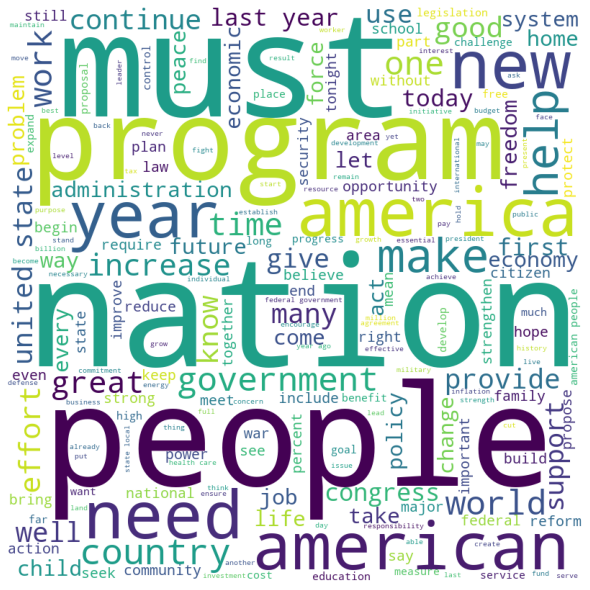

In [21]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(clean_corpuse)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Most frequent words of our corpuse

In [22]:
counter = Counter(corpuse_tokens)
most_occur = counter.most_common(50)
corpuse_fre_df = pd.DataFrame.from_records(most_occur, columns =['word', 'frequency'])
total_freq = [(x[1]/len(corpuse_tokens))*100 for x in most_occur]
corpuse_fre_df['% total frequency'] = total_freq
corpuse_fre_df

,word,frequency,% total frequency
0,year,3291,1.132855
1,american,2114,0.727698
2,new,2047,0.704635
3,people,1904,0.655410
4,nation,1870,0.643707
5,must,1848,0.636134
6,make,1829,0.629593
7,congress,1828,0.629249
8,program,1773,0.610317
9,world,1747,0.601367


### Most frequent words for each president

In [23]:
president_tokenized_doc = {}

# tokenize president speaches
for president in cleaned_text_dict.keys():
    president_tokenized_doc[president] = tokenize_text(cleaned_text_dict[president])
    
# create frequents 
president_dataframe = {}
for opt in president_tokenized_doc.keys():
     president_dataframe[opt] = FreqDist(president_tokenized_doc[opt]).most_common(50)

freq_analysis_word = pd.DataFrame(president_dataframe)
freq_analysis_word

,Harry S. Truman,Dwight D. Eisenhower,John F. Kennedy,Lyndon B. Johnson,Richard Nixon,Gerald R. Ford,Jimmy Carter,Ronald Reagan,George Bush,William J. Clinton,George W. Bush,Barack Obama,Donald J. Trump,Joseph R. Biden
0,"(year, 190)","(year, 336)","(year, 83)","(year, 382)","(year, 388)","(world, 138)","(year, 579)","(year, 288)","(year, 206)","(year, 219)","(year, 158)","(year, 243)","(year, 97)","(people, 36)"
1,"(american, 181)","(people, 271)","(crime, 59)","(new, 306)","(american, 313)","(nation, 123)","(program, 450)","(american, 180)","(program, 189)","(people, 195)","(american, 133)","(american, 181)","(work, 88)","(year, 36)"
2,"(america, 178)","(american, 226)","(state, 55)","(must, 242)","(new, 272)","(free, 102)","(congress, 421)","(program, 173)","(congress, 144)","(american, 174)","(people, 126)","(america, 167)","(people, 77)","(vietnam, 32)"
3,"(new, 153)","(must, 181)","(nation, 54)","(program, 233)","(make, 268)","(people, 101)","(nation, 383)","(nation, 172)","(federal, 137)","(must, 148)","(program, 126)","(must, 167)","(must, 73)","(nation, 29)"
4,"(make, 142)","(america, 176)","(must, 53)","(american, 230)","(people, 261)","(year, 86)","(new, 346)","(must, 169)","(government, 127)","(make, 142)","(government, 124)","(people, 149)","(american, 70)","(tonight, 26)"
5,"(people, 132)","(nation, 175)","(federal, 53)","(also, 221)","(america, 253)","(government, 76)","(state, 326)","(new, 162)","(administration, 123)","(world, 140)","(must, 123)","(work, 142)","(challenge, 64)","(must, 23)"
6,"(world, 126)","(new, 172)","(congress, 50)","(federal, 201)","(must, 227)","(great, 75)","(administration, 298)","(government, 154)","(new, 120)","(work, 133)","(congress, 113)","(congress, 139)","(make, 63)","(make, 22)"
7,"(nation, 125)","(work, 170)","(america, 48)","(make, 180)","(work, 210)","(state, 67)","(need, 281)","(make, 153)","(development, 106)","(government, 125)","(world, 112)","(world, 128)","(congress, 56)","(help, 21)"
8,"(work, 121)","(world, 169)","(law, 48)","(increase, 175)","(congress, 197)","(new, 67)","(make, 274)","(world, 148)","(nation, 104)","(nation, 124)","(federal, 107)","(make, 128)","(child, 55)","(american, 18)"
9,"(help, 104)","(make, 168)","(world, 39)","(state, 172)","(state, 191)","(war, 60)","(continue, 273)","(america, 148)","(work, 100)","(program, 124)","(make, 103)","(help, 127)","(new, 54)","(world, 18)"


### Statistical information

In [24]:
def Statistical_info(text_tokens):
  print (f"Number of words : {len(text_tokens)}")
  print (f"Number of unique  words : {len(set(text_tokens))}")
  word_len_avg = sum(map(len, text_tokens))/float(len(text_tokens))
  print (f"Average word length : {word_len_avg}")
  sent_len_avg = np.mean([len(' '.join(s)) for s in text_tokens])
  max_w = max(text_tokens, key=len)
  min_w = min(text_tokens, key=len)
  print (f"Longest word : {max_w}")
  print (f"Shortest word : {min_w}")

### Statistical information of corpuse

In [25]:
  print('*' *50)
  print('Statical information of corpus')
  print('*' *50)
  Statistical_info(corpuse_tokens)

**************************************************
Statical information of corpus
**************************************************
Number of words : 290505
Number of unique  words : 12245
Average word length : 6.419256122958297
Longest word : weapons-of-mass-destruction-related
Shortest word : ago


###Statistical information for each president

In [26]:
for president, tokens_list in tokenized_text_dict.items():
  print('*' *50)
  print(president)
  print('*' *50)
  Statistical_info(tokens_list)


**************************************************
Harry S. Truman
**************************************************
Number of words : 18507
Number of unique  words : 3450
Average word length : 6.063543524071973
Longest word : weapons-of-mass-destruction-related
Shortest word : ago
**************************************************
Dwight D. Eisenhower
**************************************************
Number of words : 26829
Number of unique  words : 4178
Average word length : 6.126132170412613
Longest word : planned-substantially
Shortest word : old
**************************************************
John F. Kennedy
**************************************************
Number of words : 7004
Number of unique  words : 2018
Average word length : 6.436607652769846
Longest word : consumer-conscious
Shortest word : p.m
**************************************************
Lyndon B. Johnson
**************************************************
Number of words : 32289
Number of unique  words : 4541


### Extract Posetive and Negative words of each president's speech

In [27]:
def extract_pos_neg(textTokens):
  sid = SentimentIntensityAnalyzer()
  pos_word_list=[]
  neg_word_list=[]

  for word in textTokens:
      if (sid.polarity_scores(word)['compound']) >= 0.5:
          pos_word_list.append(word)
      elif (sid.polarity_scores(word)['compound']) <= -0.5:
          neg_word_list.append(word)
  return pos_word_list, neg_word_list

In [59]:
for president, tokens_list in tokenized_text_dict.items():
  print('*' *250)
  print(president)
  print('*' *250)
  pos, neg= extract_pos_neg(tokens_list)
  print('Positive Words:',list(set(pos)))        
  print('Negative Words :',list(set(neg)))    

**********************************************************************************************************************************************************************************************************************************************************
Harry S. Truman
**********************************************************************************************************************************************************************************************************************************************************
Positive Words: ['liberty', 'joy', 'win', 'congratulation', 'best', 'happiness', 'heroic', 'wonderful', 'award', 'thankful', 'happy', 'paradise', 'gratitude', 'wisdom', 'generous', 'remarkable', 'perfect', 'freedom', 'brave', 'precious', 'excellence', 'encouraging', 'ideal', 'comfortable', 'justice', 'honorable', 'strong', 'peace', 'glory', 'great', 'rich', 'love', 'encourage', 'supreme', 'kind', 'appreciation', 'success', 'generosity', 'celebrate', 'proudly', 'hopeful', 'free'

### Clustering presidents with all speeches of them

- use TF-IDF to convert text to vector of numbers

In [29]:
all_p_text = list(cleaned_text_dict.values())
vectorizer = TfidfVectorizer(tokenizer=tokenize_text)
X = vectorizer.fit_transform(all_p_text)
vectorizer.get_feature_names_out()
print(X.shape)

(14, 12245)


### Convert word's vectors to the data frame

In [30]:
count_vect_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
count_vect_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a.d,a.m.e,aaron,abandon,abandoned,abandonment,abate,abatement,abbas,abdication,...,zero-based,zero-emission,zest,zigzag,zimbabwe,zimbabwe-can,zimbabwean,zion,zone,zoom
0,0.000000,0.000000,0.000000,0.005677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.003253,0.000000
1,0.000000,0.002653,0.000000,0.003018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.002653,0.002306,0.000000
2,0.000000,0.000000,0.000000,0.007049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.002533,0.000000,0.001715,0.000000,0.001928,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.004839,0.000000
4,0.000000,0.000000,0.004127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002064,0.000000,0.000000,0.000000,0.00000,0.000000,0.005381,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005067,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.005251,0.000000,0.002133,0.001066,0.000000,0.001385,0.001199,...,0.001199,0.000000,0.000000,0.001385,0.003199,0.001385,0.00277,0.000000,0.001805,0.000000
7,0.000000,0.000000,0.000000,0.004715,0.000000,0.000000,0.002394,0.005382,0.000000,0.000000,...,0.000000,0.003109,0.000000,0.000000,0.004789,0.000000,0.00000,0.000000,0.001351,0.003109
8,0.000000,0.000000,0.000000,0.001501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.003858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.001474,0.000000


### Using k-means for clustering

In [31]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(X)

### Create a data frame with presidents and their cluster's label

In [32]:
p_names = list(president_text_dict.keys())
vect_df = pd.DataFrame(p_names, columns = ['President'])
vect_df['Label'] = y
vect_df

,President,Label
0,Harry S. Truman,2
1,Dwight D. Eisenhower,2
2,John F. Kennedy,2
3,Lyndon B. Johnson,0
4,Richard Nixon,2
5,Gerald R. Ford,0
6,Jimmy Carter,0
7,Ronald Reagan,0
8,George Bush,0
9,William J. Clinton,2


### Concatenation of word vectors and previous data frame

In [33]:
final_df = pd.concat([vect_df, count_vect_df], axis=1)
f = final_df.iloc[0:12,:]
f

,President,Label,a.d,a.m.e,aaron,abandon,abandoned,abandonment,abate,abatement,...,zero-based,zero-emission,zest,zigzag,zimbabwe,zimbabwe-can,zimbabwean,zion,zone,zoom
0,Harry S. Truman,2,0.0,0.000000,0.000000,0.005677,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.003253,0.000000
1,Dwight D. Eisenhower,2,0.0,0.002653,0.000000,0.003018,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.002653,0.002306,0.000000
2,John F. Kennedy,2,0.0,0.000000,0.000000,0.007049,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,Lyndon B. Johnson,0,0.0,0.000000,0.000000,0.002533,0.0,0.001715,0.000000,0.001928,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.004839,0.000000
4,Richard Nixon,2,0.0,0.000000,0.004127,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002064,0.000000,0.000000,0.000000,0.00000,0.000000,0.005381,0.000000
5,Gerald R. Ford,0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.005067,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
6,Jimmy Carter,0,0.0,0.000000,0.000000,0.005251,0.0,0.002133,0.001066,0.000000,...,0.001199,0.000000,0.000000,0.001385,0.003199,0.001385,0.00277,0.000000,0.001805,0.000000
7,Ronald Reagan,0,0.0,0.000000,0.000000,0.004715,0.0,0.000000,0.002394,0.005382,...,0.000000,0.003109,0.000000,0.000000,0.004789,0.000000,0.00000,0.000000,0.001351,0.003109
8,George Bush,0,0.0,0.000000,0.000000,0.001501,0.0,0.000000,0.000000,0.000000,...,0.003426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
9,William J. Clinton,2,0.0,0.000000,0.000000,0.003858,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.001474,0.000000


### Use PCA for dimension reduction

In [34]:
pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(X.todense())
dense_df = pd.DataFrame(reduced_data, columns=['X','Y'])
dense_df


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


,X,Y
0,-0.191448,-0.168205
1,-0.156066,-0.076659
2,0.135494,0.270669
3,0.171819,-0.053004
4,-0.096581,-0.154665
5,-0.118891,0.182466
6,0.345994,-0.000595
7,0.106042,-0.067579
8,0.432166,0.004532
9,-0.038958,-0.101703


### Concatenation of dense data frame and president' label

In [35]:
final_dense_df = pd.concat([vect_df, dense_df], axis=1)
final_dense_df

,President,Label,X,Y
0,Harry S. Truman,2,-0.191448,-0.168205
1,Dwight D. Eisenhower,2,-0.156066,-0.076659
2,John F. Kennedy,2,0.135494,0.270669
3,Lyndon B. Johnson,0,0.171819,-0.053004
4,Richard Nixon,2,-0.096581,-0.154665
5,Gerald R. Ford,0,-0.118891,0.182466
6,Jimmy Carter,0,0.345994,-0.000595
7,Ronald Reagan,0,0.106042,-0.067579
8,George Bush,0,0.432166,0.004532
9,William J. Clinton,2,-0.038958,-0.101703


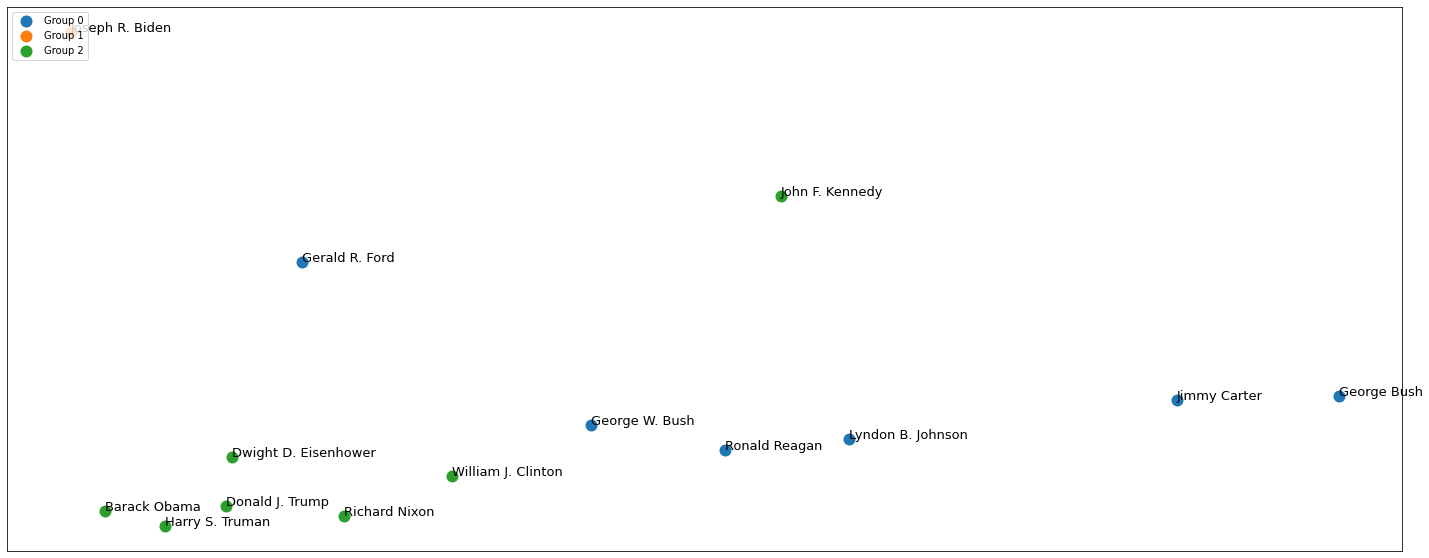

In [36]:
groups = final_dense_df.groupby('Label')
cluster_names_0 = {0: 'Group 0', 1: 'Group 1', 2: 'Group 2' }
fig, ax = plt.subplots(figsize=(25, 10)) 
for name, group in groups:
    ax.plot(group.X, group.Y, marker='o', linestyle='', ms=12, 
            label=cluster_names_0[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         
        which='both',     
        left=False,      
        top=False,         
        labelleft=False)
    
ax.legend(numpoints=1, loc='upper left')
#add label in x,y position with the label as the speech title
for i in range(len(final_dense_df)):
    ax.text(final_dense_df.loc[i]['X'], final_dense_df.loc[i]['Y'], final_dense_df.loc[i]['President'], size=13)  

plt.show()

## Clustering each speech of president
- repeat pervious steps

In [37]:
clean_all_text = [normalize_and_cleaning(t) for t in all_text_list]

In [38]:
vectorizer2 = TfidfVectorizer(stop_words='english',max_df = 0.42, min_df = 0.01)
Y = vectorizer2.fit_transform(clean_all_text)
print(Y.shape)
count_vect_df2 = pd.DataFrame(Y.todense(), columns=vectorizer2.get_feature_names())
count_vect_df2


(82, 10391)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,abandon,abandoned,abandonment,abate,abatement,abbas,abdication,abduction,abhorrent,...,zeitchik,zelenskiy,zero,zest,zigzag,zimbabwe,zimbabwean,zion,zone,zoom
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.029029,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.023764,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.058287,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.0,0.014425,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.025932,0.0,0.0,0.000000,0.0
78,0.0,0.059075,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.024150,0.0
79,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
80,0.0,0.000000,0.051964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.033436,0.0,0.0,0.000000,0.0,0.0,0.059525,0.0


In [39]:
kmeans = KMeans(n_clusters=2)
y2 = kmeans.fit_predict(Y)
p_names2 = concat_president_year
vect_df2 = pd.DataFrame(p_names2, columns = ['President'])
vect_df2['Label'] = y2

In [40]:
pca_num_components = 2
reduced_data2 = PCA(n_components=pca_num_components).fit_transform(Y.todense())
dense_df2 = pd.DataFrame(reduced_data2, columns=['X2','Y2'])
dense_df2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


,X2,Y2
0,-0.108103,0.206806
1,0.373518,0.212912
2,0.106924,0.025094
3,-0.085745,-0.097403
4,0.368814,0.147788
...,...,...
77,0.379600,0.203361
78,0.181869,-0.000315
79,-0.200819,-0.196733
80,0.083439,-0.071375


In [41]:
final_dense_df2 = pd.concat([vect_df2, dense_df2], axis=1)
final_dense_df2

,President,Label,X2,Y2
0,Harry S. Truman_1947,0,-0.108103,0.206806
1,Harry S. Truman_1948,1,0.373518,0.212912
2,Harry S. Truman_1949,1,0.106924,0.025094
3,Harry S. Truman_1950,0,-0.085745,-0.097403
4,Harry S. Truman_1951,1,0.368814,0.147788
...,...,...,...,...
77,Barack Obama_2016,1,0.379600,0.203361
78,Donald J. Trump_2018,1,0.181869,-0.000315
79,Donald J. Trump_2019,0,-0.200819,-0.196733
80,Donald J. Trump_2020,1,0.083439,-0.071375


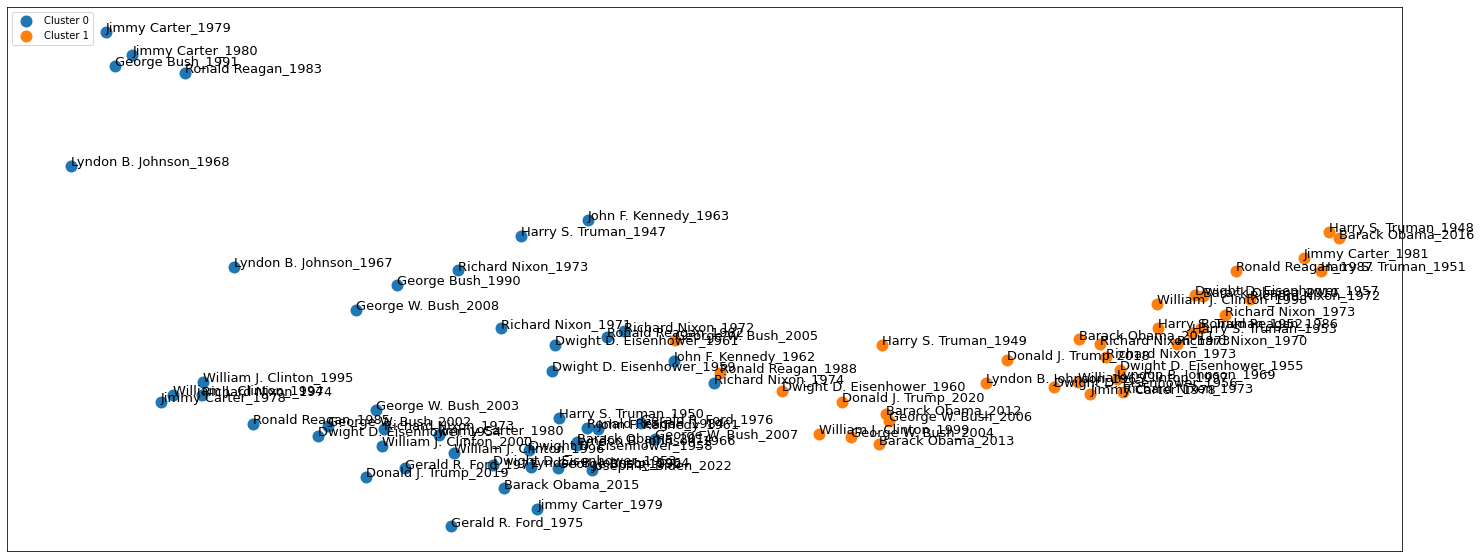

In [42]:
groups2 = final_dense_df2.groupby('Label')
cluster_names_0 = {0: 'Cluster 0', 1: 'Cluster 1' }
# set up plot
fig, ax = plt.subplots(figsize=(25, 10))
for name, group in groups2:
    ax.plot(group.X2, group.Y2, marker='o', linestyle='', ms=12, 
            label=cluster_names_0[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         
        which='both',     
        left=False,      
        top=False,         
        labelleft=False)
    
ax.legend(numpoints=1, loc='upper left') 

for i in range(len(final_dense_df2)):
    ax.text(final_dense_df2.loc[i]['X2'], final_dense_df2.loc[i]['Y2'], final_dense_df2.loc[i]['President'], size=13)  

    
    
plt.show()

## Using NMF model

In [61]:
vectorizer = TfidfVectorizer(stop_words='english',tokenizer=tokenize_text, max_df = 0.42, min_df = 0.01) 
word_vec = vectorizer.fit_transform(clean_all_text) 
word_vec.shape

(82, 11353)

In [44]:
TOPIC = 8 
nmf_model = NMF(TOPIC) # create an object
resualt_nmf = nmf_model.fit_transform(word_vec)
features = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
index_list = []
for i in range(8):
  index_text = f'Topic {i}'
  index_list.append(index_text)

df_topic = pd.DataFrame(nmf_model.components_.round(4), index = index_list, columns = features)
df_topic

,a.d,a.m.e,aaron,abandon,abandoned,abandonment,abate,abatement,abbas,abdication,...,zero-based,zero-emission,zest,zigzag,zimbabwe,zimbabwe-can,zimbabwean,zion,zone,zoom
Topic 0,0.0154,0.0001,0.0000,0.0254,0.0000,0.0035,0.0044,0.0000,0.0000,0.0036,...,0.0000,0.0000,0.0000,0.0105,0.0000,0.0000,0.0000,0.0001,0.0000,0.0001
Topic 1,0.0000,0.0003,0.0000,0.0087,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0012,0.0000,0.0000,0.0000,0.0000,0.0003,0.0000,0.0010
Topic 2,0.0000,0.0000,0.0000,0.0354,0.0000,0.0000,0.0001,0.0000,0.0125,0.0000,...,0.0000,0.0109,0.0000,0.0000,0.0162,0.0000,0.0001,0.0000,0.0027,0.0000
Topic 3,0.0000,0.0000,0.0000,0.0102,0.0000,0.0027,0.0061,0.0121,0.0000,0.0000,...,0.0058,0.0000,0.0037,0.0003,0.0091,0.0026,0.0045,0.0000,0.0087,0.0006
Topic 4,0.0000,0.0000,0.0000,0.0239,0.0000,0.0011,0.0000,0.0009,0.0000,0.0152,...,0.0000,0.0004,0.0027,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Topic 5,0.0000,0.0075,0.0191,0.0158,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0075,0.0356,0.0000
Topic 6,0.0000,0.0000,0.0000,0.0061,0.0007,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0184,0.0000
Topic 7,0.0000,0.0000,0.0000,0.0272,0.0186,0.0142,0.0000,0.0000,0.0000,0.0007,...,0.0000,0.0008,0.0022,0.0000,0.0000,0.0000,0.0000,0.0000,0.0628,0.0116


In [46]:
def nmf_display(nmf_model, feature_names, number_show):
    for ind, topic in enumerate(nmf_model.components_):
        topic_list = [feature_names[i] for i in np.argsort(topic * -1)[:number_show]]
        print(f"Topic {ind}: {topic_list}")
        

In [47]:
n_top_words = 10
nmf_display(nmf_model, features, n_top_words)

Topic 0: ['communist', 'atomic', 'activity', 'collective', 'agriculture', 'management', 'session', 'armed', 'agricultural', 'adjustment']
Topic 1: ['company', 'kid', 'class', 'folk', 'oil', 'democrat', 'politics', 'gas', 'innovation', 'manufacturing']
Topic 2: ['iraq', 'terrorist', 'iraqi', 'terror', 'qaida', 'saddam', 'regime', 'hussein', 'afghanistan', 'coalition']
Topic 3: ['oil', 'environmental', 'regulatory', 'u.s', 'management', 'urban', 'addition', 'significant', 'implement', 'funding']
Topic 4: ['vietnam', 'session', 'abundance', 'communist', 'property', 'seventy', 'genius', 'quest', 'wish', 'gold']
Topic 5: ['ought', 'gun', 'police', 'class', 'internet', 'millennium', 'lot', 'grade', 'bosnia', 'brady']
Topic 6: ['u.s.a', 'criminal', 'incredible', 'ice', 'isi', 'illegal', 'alice', 'audience', 'alien', 'hero']
Topic 7: ['revolution', 'nicaragua', 'yes', 'excellence', 'dependency', 'veto', 'hero', 'victim', 'sdi', 'sandinistas']


In [48]:

H = pd.DataFrame(resualt_nmf.round(4), columns = index_list)


In [49]:
H

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7
0,0.0000,0.0494,0.0000,0.2900,0.0135,0.0000,0.0000,0.0000
1,0.0000,0.0327,0.5320,0.0013,0.0000,0.0000,0.0000,0.0000
2,0.0139,0.0000,0.1780,0.0477,0.0036,0.0317,0.0000,0.1170
3,0.0000,0.0000,0.0000,0.0368,0.3476,0.0000,0.0049,0.0285
4,0.0000,0.0000,0.5267,0.0000,0.0000,0.0135,0.0069,0.0000
...,...,...,...,...,...,...,...,...
77,0.0000,0.0192,0.5466,0.0000,0.0000,0.0000,0.0000,0.0000
78,0.0000,0.0000,0.0000,0.0143,0.0139,0.4754,0.0729,0.0000
79,0.2424,0.0000,0.0000,0.0000,0.0000,0.0000,0.0021,0.0089
80,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0273,0.5122


In [50]:
model = KMeans(n_clusters = 8)
model.fit(H)
print (model.labels_)
H['clust'] = pd.Series(model.labels_)
H['Year'] = df['Year']
H.head()

[7 2 6 0 2 5 5 0 6 5 3 2 0 6 4 0 0 6 7 6 3 0 7 7 1 5 0 6 2 5 6 3 7 1 3 4 6
 6 0 6 1 6 6 7 7 0 2 6 7 0 6 5 2 4 7 7 0 6 6 6 3 5 4 6 6 6 4 0 4 0 7 5 3 4
 4 0 6 2 3 6 4 0]


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,clust,Year
0,0.0000,0.0494,0.0000,0.2900,0.0135,0.0000,0.0000,0.0000,7,1947
1,0.0000,0.0327,0.5320,0.0013,0.0000,0.0000,0.0000,0.0000,2,1948
2,0.0139,0.0000,0.1780,0.0477,0.0036,0.0317,0.0000,0.1170,6,1949
3,0.0000,0.0000,0.0000,0.0368,0.3476,0.0000,0.0049,0.0285,0,1950
4,0.0000,0.0000,0.5267,0.0000,0.0000,0.0135,0.0069,0.0000,2,1951


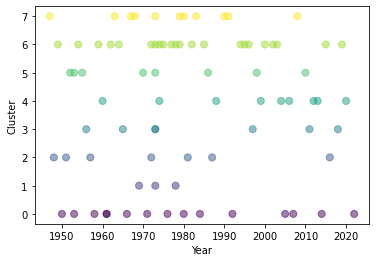

In [51]:
plt.scatter(H['Year'], H['clust'], c= model.labels_.astype(float), s=50, alpha=0.5)

plt.xlabel("Year") 
plt.ylabel("Cluster")
plt.show()

### Named Entity Recognition (NER)

In [52]:
def specify_NER(raw_text):
  ents = Counter()
  doc = ner.name(raw_text, language='en_core_web_sm')
  text_label = [(X.text, X.label_) for X in doc]
  for text, label in text_label:
      raw_text = raw_text.replace(text, label)
      ents[f"{label}"] += 1   
  return raw_text, ents

### Plot number of occurrences of each entity

In [53]:
def create_bar_plot(ents, president):
  ents_names, ents_count = zip(*ents.items())
  fig = plt.figure(figsize = (25,4))
  plt.bar(ents_names, ents_count, color ='#5F9EA0')
  plt.ylabel("No. Of Each Entity")
  plt.title(president,fontsize=25)
  plt.show()

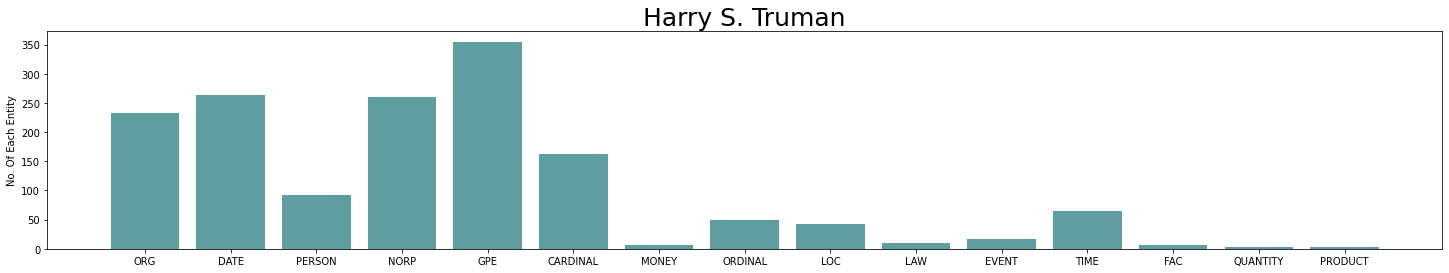

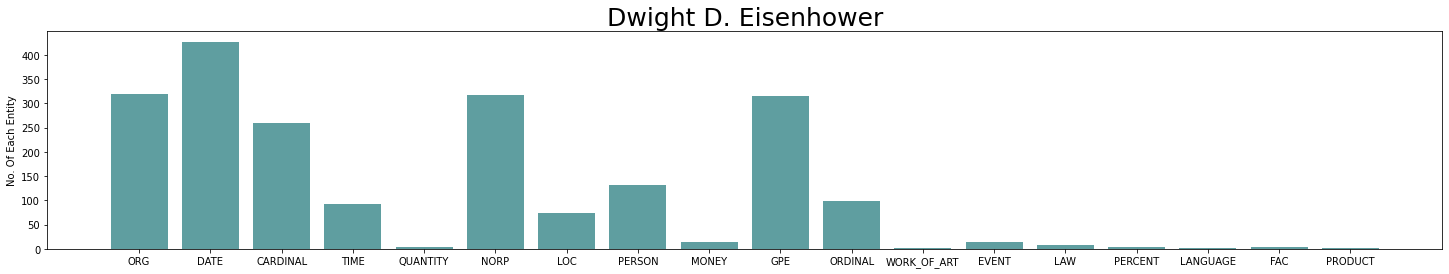

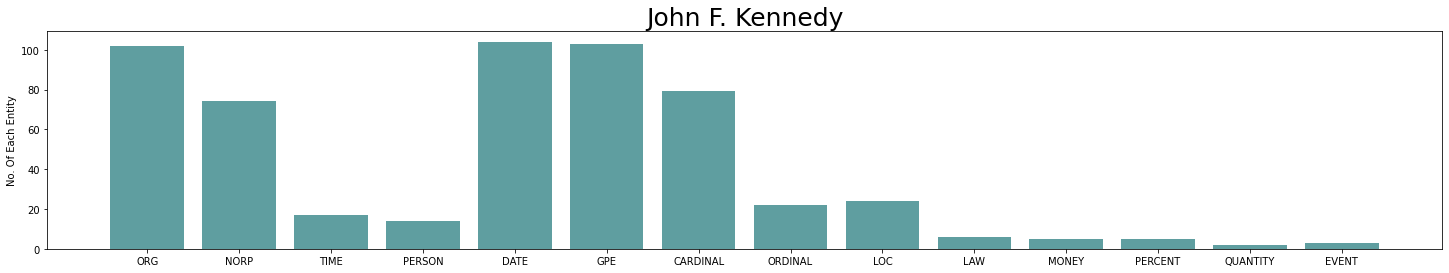

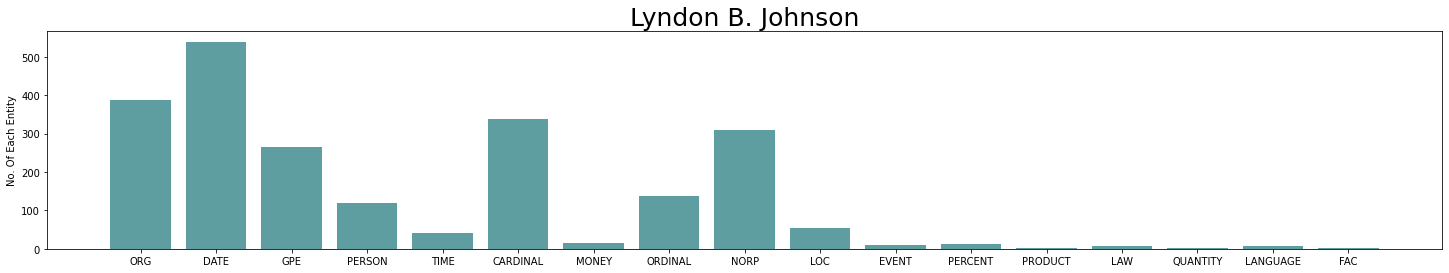

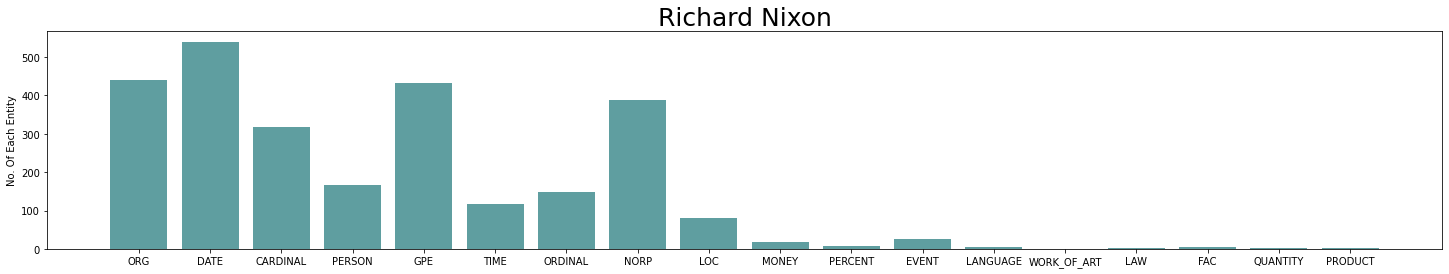

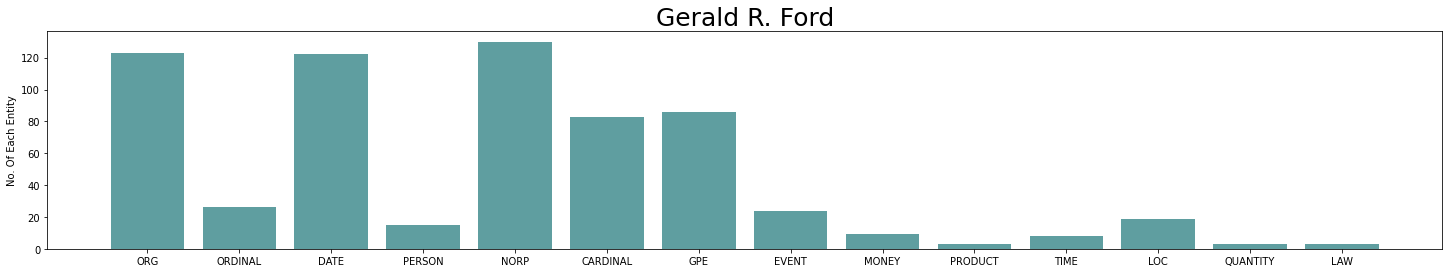

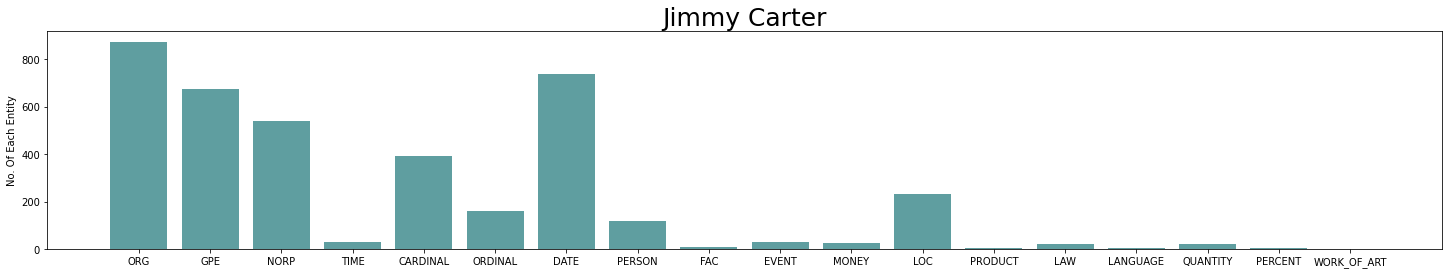

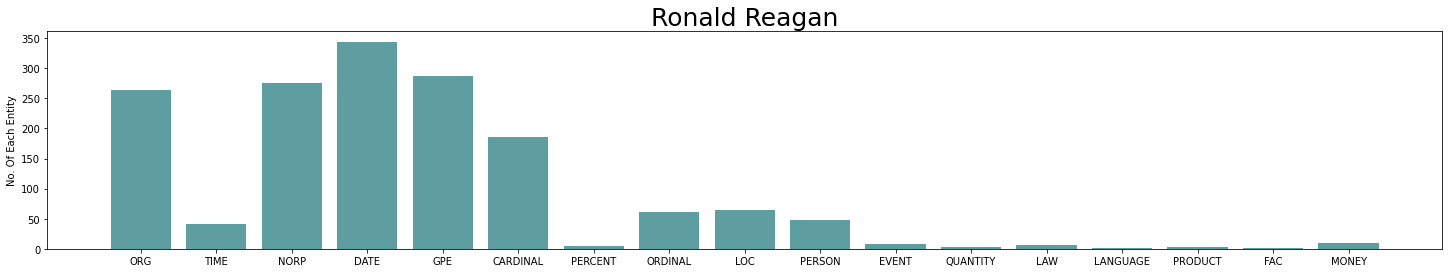

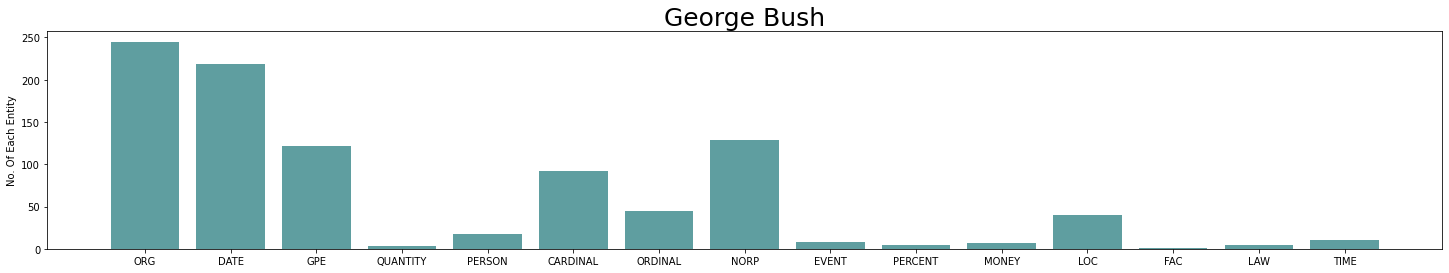

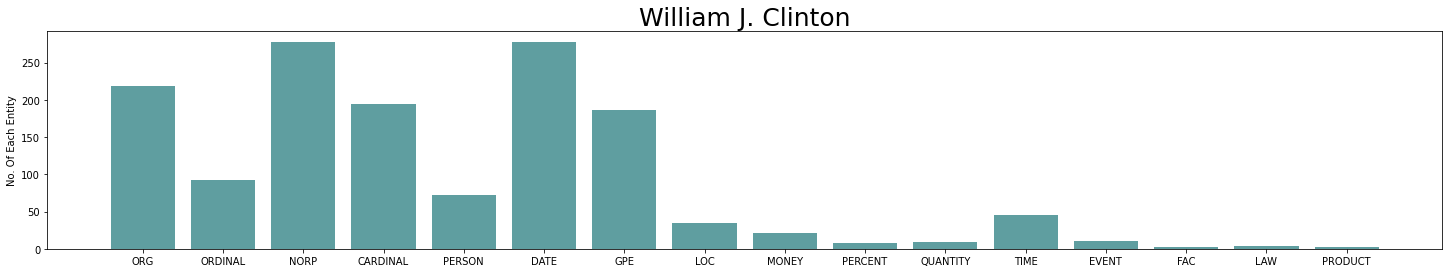

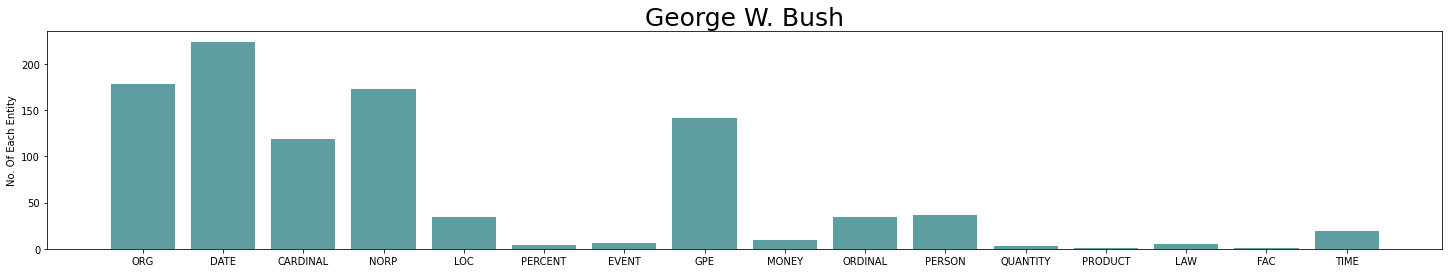

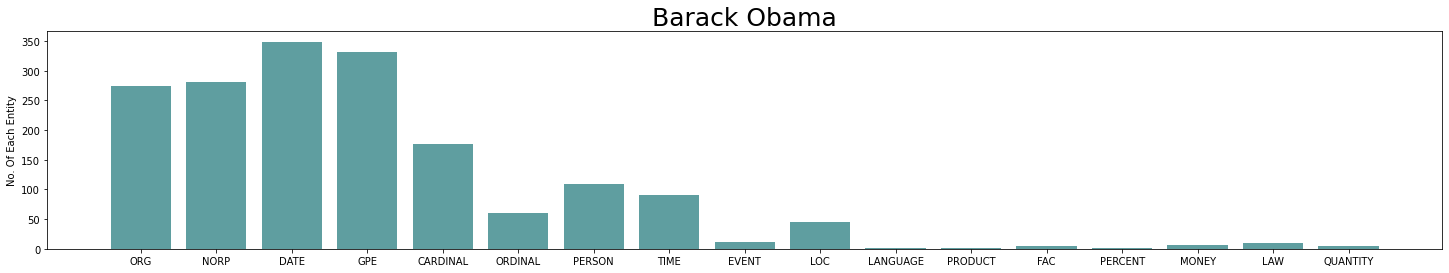

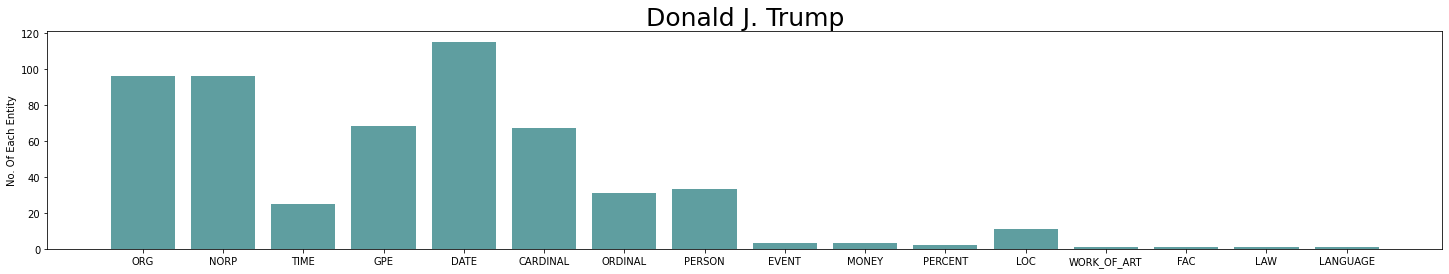

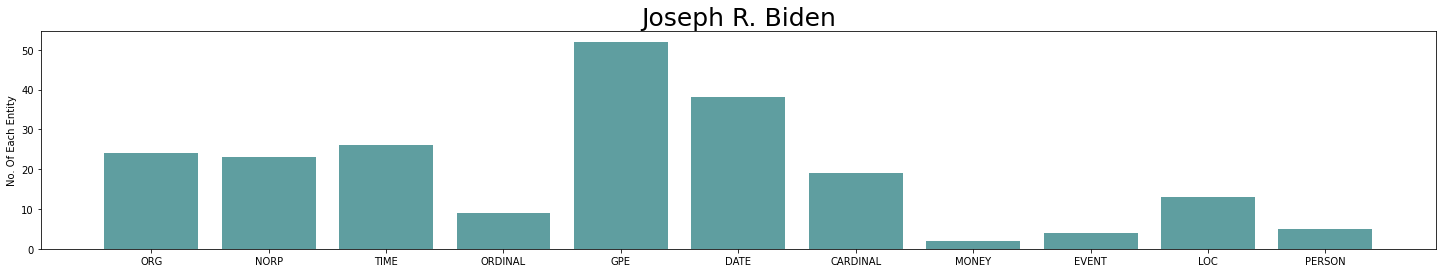

In [54]:
for president, clean_text in cleaned_text_dict.items():
  text , entity_counter = specify_NER(clean_text)
  create_bar_plot(entity_counter,president)
  print('\n')
  print('\n')


## Extract key phrases

In [55]:
# https://github.com/language-ml/course-nlp-ir-1-text-exploring/blob/main/notebooks/English/ExploreYourTextCollection-English.ipynb
def chunkTechnicalTerm(sentence):
    grammar = r"""
      TECHTERM: {<JJ|NN>+<NN|CD>|<NN>}
    """
    cp = RegexpParser(grammar)
    return (cp.parse(sentence))

In [56]:
def extract_key(dict_of_corpous, min_count):
    president_technical_terms = {}

    for president in dict_of_corpous.keys():
        president_technical_terms[president] = []
        sentences_tagged = []
        corpus_normlized = normalize_and_cleaning(dict_of_corpous[president], lemm=False, stop_word=False, remove_punct=False, remove_number=False)
        sentences = sent_tokenize(corpus_normlized)
        sentences = [normalize_and_cleaning(sen, lemm=False, stop_word=False) for sen in sentences]
        for sent in sentences:
            try:
                sentences_tagged.append(pos_tag(sent.split(' ')))
            except:
                pass
        for the_sentence in sentences_tagged:
            tree=chunkTechnicalTerm(the_sentence)
            for subtree in tree.subtrees():
                if subtree.label() == 'TECHTERM':
                    president_technical_terms[president].append(subtree.leaves())



    for president in president_technical_terms.keys():
        president_technical_terms[president]=FreqDist([' '.join([x for x,y in sent]) for sent in president_technical_terms[president] if len(sent)>1]).most_common(min_count)    


    president_technical_terms = pd.DataFrame(president_technical_terms) 
    return president_technical_terms

In [57]:
join_text_dict = {}
for president, text_list in president_text_dict.items():
  join_text_dict[president] = ' '.join(text_list)

In [58]:
MIN_COUNT = 40
freq_analysis_phrase2 = extract_key(join_text_dict, MIN_COUNT)
freq_analysis_phrase2

,Harry S. Truman,Dwight D. Eisenhower,John F. Kennedy,Lyndon B. Johnson,Richard Nixon,Gerald R. Ford,Jimmy Carter,Ronald Reagan,George Bush,William J. Clinton,George W. Bush,Barack Obama,Donald J. Trump,Joseph R. Biden
0,"(health care, 12)","(last year, 20)","(soviet union, 15)","(federal government, 32)","(federal government, 30)","(free world, 27)","(soviet union, 51)","(last year, 27)","(federal government, 26)","(federal government, 23)","(federal government, 18)","(social security, 22)","(federal government, 6)","(great society, 4)"
1,"(last year, 9)","(soviet union, 15)","(death penalty, 13)","(first time, 20)","(last year, 24)","(soviet union, 13)","(federal government, 43)","(federal government, 20)","(last year, 16)","(first time, 14)","(social security, 8)","(last year, 19)","(first time, 4)","(last year, 4)"
2,"(health insurance, 9)","(cold war, 12)","(law enforcement, 10)","(last year, 20)","(economic growth, 13)","(federal government, 12)","(last year, 40)","(soviet union, 16)","(community development, 12)","(last year, 13)","(past year, 7)","(past year, 8)","(past year, 4)","(great health, 2)"
3,"(middle east, 8)","(federal government, 12)","(middle east, 6)","(new budget, 12)","(foreign policy, 10)","(world war, 6)","(past four, 29)","(past year, 15)","(past two, 9)","(economic growth, 9)","(fiscal year, 7)","(first time, 6)","(same time, 4)","(war poverty, 2)"
4,"(first time, 7)","(long time, 10)","(federal government, 6)","(executive branch, 11)","(national security, 10)","(past eight, 5)","(past year, 27)","(foreign policy, 11)","(private sector, 8)","(health care, 9)","(past four, 7)","(economic growth, 6)","(economic growth, 4)","(control population growth, 2)"
5,"(federal government, 6)","(saddam hussein, 10)","(world peace, 5)","(unemployment rate, 9)","(middle class, 9)","(free society, 5)","(same time, 22)","(same time, 10)","(last two, 6)","(past eight, 8)","(same time, 6)","(white house, 6)","(willing work, 3)","(eastern europe, 2)"
6,"(recovery act, 6)","(first time, 9)","(tax bill, 4)","(fiscal year, 9)","(vice president, 8)","(same time, 4)","(past three, 17)","(private sector, 9)","(economic development, 6)","(social security, 6)","(economic growth, 5)","(health insurance, 6)","(long time, 3)","(next year, 2)"
7,"(clean energy, 6)","(health care, 8)","(department justice, 4)","(social security, 8)","(minimum wage, 8)","(presidential office, 3)","(social security, 16)","(middle east, 9)","(urban development, 5)","(past year, 5)","(new world, 5)","(soviet union, 6)","(good job, 3)","(year term, 2)"
8,"(middle class, 6)","(middle east, 8)","(new code, 4)","(same time, 8)","(right thing, 8)","(executive branch, 3)","(first time, 15)","(only way, 7)","(executive branch, 5)","(free world, 5)","(equal opportunity, 5)","(world war, 5)","(minimum wage, 3)","(american nation, 2)"
9,"(right thing, 6)","(minimum wage, 7)","(special action office, 4)","(low income, 8)","(middle east, 8)","(whole free world, 3)","(middle east, 15)","(quality life, 6)","(past year, 5)","(military strength, 5)","(free world, 4)","(same time, 5)","(long run, 3)","(next fiscal year, 2)"
